In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift

#Understanding the system
import os
print(os.name)
print(os.getcwd())

#Looking at the dataset.
print("\n\n\n")
df = pd.read_csv("Absenteeism_at_work.csv")
print(df)
print("\n\n\n")
print(df.describe())
print("\n\n\n")
print(df.info())

nt
C:\Users\exfmti\Desktop\Semester5\DataAnalytics\Assignments\Assignment6




     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
5     3                  23                 7                6        1   
6    10                  22                 7                6        1   
7    20                  23                 7                6        1   
8    14                  19                 7                2        1   
9     1                  22                 7                2        1   
10   20                   1                 7                2        1   
11   20              

In [45]:
#Dropping the ID Column
#Remember, Python is 0-offset!
X = df[df.columns[1:]]
print(X.describe(), "\n\n\n")


#Performing MeanShift Clustering
clustering = MeanShift(bandwidth = 2, bin_seeding=True).fit_predict(X) #Returns labels for each row(check using len(clustering))
labels = ms.labels_  #Retrive the labels for each datapoint
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Estimated cluster centers : \n", cluster_centers, "\n")
print("Number of estimated clusters : %d" % n_clusters_, "\n")
print("Labels are : ", labels_unique)

       Reason for absence  Month of absence  Day of the week     Seasons  \
count          740.000000        740.000000       740.000000  740.000000   
mean            19.216216          6.324324         3.914865    2.544595   
std              8.433406          3.436287         1.421675    1.111831   
min              0.000000          0.000000         2.000000    1.000000   
25%             13.000000          3.000000         3.000000    2.000000   
50%             23.000000          6.000000         4.000000    3.000000   
75%             26.000000          9.000000         5.000000    4.000000   
max             28.000000         12.000000         6.000000    4.000000   

       Transportation expense  Distance from Residence to Work  Service time  \
count              740.000000                       740.000000    740.000000   
mean               221.329730                        29.631081     12.554054   
std                 66.952223                        14.836788      4.38487

In [129]:
#Train and Test

train = pd.read_csv("Split/Split1/Train.csv")
test = pd.read_csv("Split/Split1/Test.csv")

#Dropping the ID Column
#Remember, Python is 0-offset!
X = ds[ds.columns[1:]]
print(X.describe(), "\n\n\n")


#Performing MeanShift Clustering
clustering = MeanShift(bandwidth = 2, bin_seeding=True).fit_predict(X) #Returns labels for each row(check using len(clustering))
labels = ms.labels_  #Retrive the labels for each datapoint
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Estimated cluster centers : \n", cluster_centers, "\n")
print("Number of estimated clusters : %d" % n_clusters_, "\n")
print("Labels are : ", labels_unique)


NameError: name 'ds' is not defined

In [67]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps = 8.5, min_samples = 5, metric = 'euclidean').fit(X)
#db = DBSCAN().fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 19


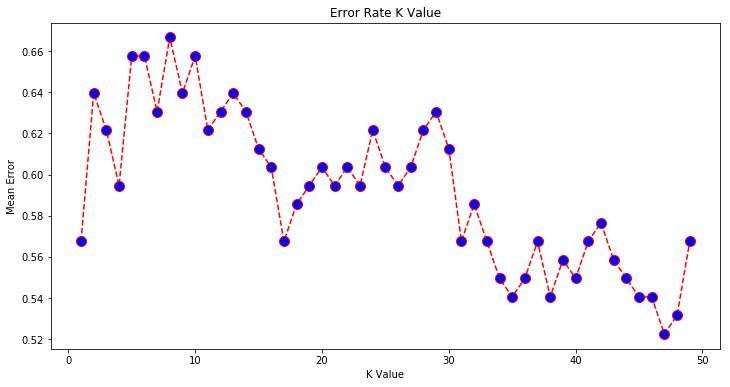

Accuracy =  0.4774774774774775 


Confusion matrix:
[[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6  2  0  0  2  0  0  0  0  0  0  0]
 [ 0  0 12  1  0  0  5  0  0  0  0  0  0  0]
 [ 0  0 11 11  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  3  0  2  0  3  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  2  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]] 

 Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      0.17      0.29        12
          2       0.26      0.67      0.38        18
          3       0.69      0.44      0.54        25
          4       1.00      0.25      0.

In [131]:
#KNN
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

X = df.iloc[:, :-1].values  
y = df.iloc[:, 14].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# Calculating error for K values between 1 and 50
error = []
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')
plt.show()

from sklearn.neighbors import KNeighborsClassifier
index_min = np.argmin(error)
classifier = KNeighborsClassifier(n_neighbors = index_min+1)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  

count = 0
for i in range(len(y_pred)):
    if(y_pred[i] == y_test[i]):
        count += 1

print("Accuracy = ", count/len(y_pred), "\n\n")
        
from sklearn.metrics import classification_report, confusion_matrix 
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred),"\n\n Report:")  
print(classification_report(y_test, y_pred)) 

In [4]:
#Random Forest
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values  
y = df.iloc[:, 14].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Calculating error for n_neigh values between 300 and 500
error = []
for i in range(300, 500):  
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(300, 500), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Plot')  
plt.xlabel('n_neigh Value')  
plt.ylabel('Mean Error')
plt.show()

#Create a Gaussian Classifier
index_min = np.argmin(error)
clf=RandomForestClassifier(n_estimators = index_min+300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'plt' is not defined

In [ ]:
clf=RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))